In [1]:
# Clone the GitHub repository
# !git clone https://github.com/rugvedmhatre/Multimodal-Sentiment-Analysis.git
# %cd Multimodal-Sentiment-Analysis
!git clone https://github.com/saumitkunder/MMAL_MINI_Project.git
%cd MMAL_MINI_Project

Cloning into 'MMAL_MINI_Project'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 47 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 729.05 KiB | 6.28 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/MMAL_MINI_Project


In [2]:

# Add project directory to Python path
# import sys
# sys.path.append('/content/Multimodal-Sentiment-Analysis')
import sys
sys.path.append('/content/MMAL_MINI_Project')


In [3]:
!pip install torch==1.12.1 torchtext==0.13.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.0+cu121
    Uninstalling torch-2.5.0+cu121:
      Successfully uninstalled torch-2.5.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.13.2 requires torch>=1.13.0, but you have torch 1.12.1 which is incompatible.
torchaudio 2.5.0+cu121 requires torch==2.5.0, but you have torch 1.12.1 which is incompatible.
torchvision 0.20.0+cu121 requires torch==2.5.0, but you have torch 1.12.1 which is incompatible.


In [4]:

# Install required libraries
!pip install numpy matplotlib gdown
import importlib


In [6]:
!find /content/MMAL_MINI_Project -name "get_data.py"


/content/MMAL_MINI_Project/helpers/data/get_data.py


In [7]:
!ls /content/MMAL_MINI_Project/helpers


data  fusions  training  unimodals  utils


In [8]:
import sys
sys.path.append('/content/MMAL_MINI_Project/notebooks')


In [ ]:
from helpers.data.get_data import get_dataloader


# Datasets

In this notebook, we get the CMU-MOSI and CMU-MOSEI dataset from CMU's Google Drive Directory. This directory has the the pickle files that we require for our project.

## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# !mkdir data
# !pip install gdown

## Importing Helper Functions

## Downloading CMU-MOSI Dataset

We download the pickle file from the Google Drive links from the documentation...

### mosi_raw.pkl

In [ ]:
# # !cd data
# !gdown https://drive.google.com/u/0/uc?id=1szKIqO0t3Be_W91xvf6aYmsVVUa7wDHU

### mosi_data.pkl

In [ ]:
# !gdown --fuzzy "https://drive.google.com/file/d/1_XdzdW8UNG1TTS6QcX10uhoS6N11OBit/view?usp=share_link"

## Exploring CMU-MOSI Dataset

In [ ]:
traindata, validdata, testdata = get_dataloader(
    '/content/Multimodal-Sentiment-Analysis/mosi_raw.pkl', robust_test=False, max_pad=True, data_type='mosi', max_seq_len=50)

Verifying the train, validation and test data size.

In [ ]:
traindata_size = len(traindata.dataset)
validdata_size = len(validdata.dataset)
testdata_size = len(testdata.dataset)

print("Train Data Size      :", traindata_size)
print("Validation Data Size :", validdata_size)
print("Test  Data Size      :", testdata_size)

totaldata_size = traindata_size + validdata_size + testdata_size
print("Total Data Size      :", totaldata_size)

Train Data Size      : 1283
Validation Data Size : 214
Test  Data Size      : 686
Total Data Size      : 2183


In [ ]:
for batch in traindata:
    inputs = batch
    break

In [ ]:
print("Shape of input sample:", len(inputs))
print("Shape of input item 1:", inputs[0].shape)
print("Shape of input item 2:", inputs[1].shape)
print("Shape of input item 3:", inputs[2].shape)
print("Shape of input item 4:", inputs[3].shape)

Shape of input sample: 4
Shape of input item 1: torch.Size([32, 50, 35])
Shape of input item 2: torch.Size([32, 50, 74])
Shape of input item 3: torch.Size([32, 50, 300])
Shape of input item 4: torch.Size([32, 1])


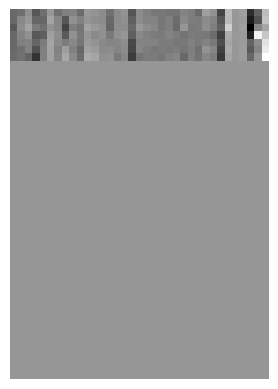

In [ ]:
plt.imshow(inputs[0][0], cmap='gray')
plt.axis('off')
plt.show()

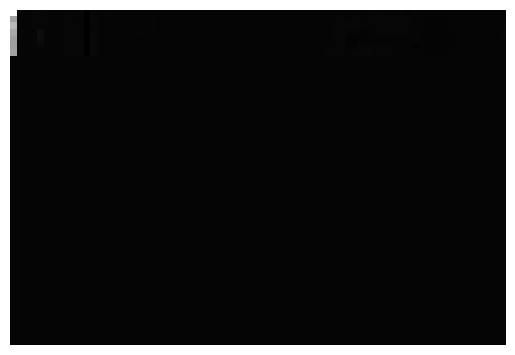

In [ ]:
plt.imshow(inputs[1][0], cmap='gray')
plt.axis('off')
plt.show()

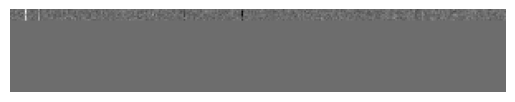

In [ ]:
plt.imshow(inputs[2][0], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
inputs[3][0]

tensor([-1.4000])

## EARLY FUSION

In [ ]:
import os
import sys
import torch

import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

In [ ]:
# !pip install torch --upgrade


In [ ]:
# # For CUDA 11.3
# !pip install torch==1.11.0+cu113 torchvision==0.11.0+cu113 torchaudio==0.11.0 -f https://download.pytorch.org/whl/torch_stable.html


In [ ]:
# !pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
!pip install torchvision==0.13.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 82.0 MB/s eta 0:00:00


In [ ]:
!pip install memory_profiler


In [ ]:
from helpers.data.get_data import get_dataloader
from helpers.unimodals.common_models import GRU, MLP, Sequential, Identity
from helpers.training.supervised_learning import train, test
from helpers.fusions.common_fusions import ConcatEarly
from helpers.utils.common_utils import get_default_device, save_results

In [ ]:
traindata, validdata, testdata = get_dataloader(
    '/content/Multimodal-Sentiment-Analysis/mosi_raw.pkl', robust_test=False, max_pad=True, data_type='mosi', max_seq_len=50)

In [ ]:
device = get_default_device()
print(device)

cpu


In [ ]:
encoders = [Identity().to(device), Identity().to(device), Identity().to(device)]
head = Sequential(GRU(409, 512, dropout=True, has_padding=False,
                  batch_first=True, last_only=True), MLP(512, 512, 1)).to(device)

In [ ]:
fusion = ConcatEarly().to(device)


In [ ]:
FILE_NAME = 'mosi_ef_r0'


In [ ]:
rain_losses, valid_losses = train(encoders, fusion, head, traindata, validdata, 100, task="regression", optimtype=torch.optim.AdamW,
      is_packed=False, lr=1e-3, save=f'/content/drive/MyDrive/Btech project/saum_mmal/models/{FILE_NAME}.pt', weight_decay=0.01, objective=torch.nn.L1Loss())

Epoch [1/100]
Train Loss: 1.3256
Valid Loss: 1.3852
Saving Best

Epoch [2/100]
Train Loss: 1.3193
Valid Loss: 1.3883

Epoch [3/100]
Train Loss: 1.3207
Valid Loss: 1.3844
Saving Best

Epoch [4/100]
Train Loss: 1.3293
Valid Loss: 1.3880

Epoch [5/100]
Train Loss: 1.3180
Valid Loss: 1.3871

Epoch [6/100]
Train Loss: 1.3194
Valid Loss: 1.3887

Epoch [7/100]
Train Loss: 1.3163
Valid Loss: 1.3854

Epoch [8/100]
Train Loss: 1.3183
Valid Loss: 1.3858

Epoch [9/100]
Train Loss: 1.3202
Valid Loss: 1.3689
Saving Best

Epoch [10/100]
Train Loss: 1.3187
Valid Loss: 1.3852

Epoch [11/100]
Train Loss: 1.3172
Valid Loss: 1.3865

Epoch [12/100]
Train Loss: 1.3151
Valid Loss: 1.3848

Epoch [13/100]
Train Loss: 1.3181
Valid Loss: 1.3824

Epoch [14/100]
Train Loss: 1.3159
Valid Loss: 1.3825

Epoch [15/100]
Train Loss: 1.3133
Valid Loss: 1.3908

Epoch [16/100]
Train Loss: 1.3139
Valid Loss: 1.3827

Epoch [17/100]
Train Loss: 1.3133
Valid Loss: 1.3885

Epoch [18/100]
Train Loss: 1.3139
Valid Loss: 1.3901

E

Text(0.5, 1.0, 'Loss vs. No. of epochs')

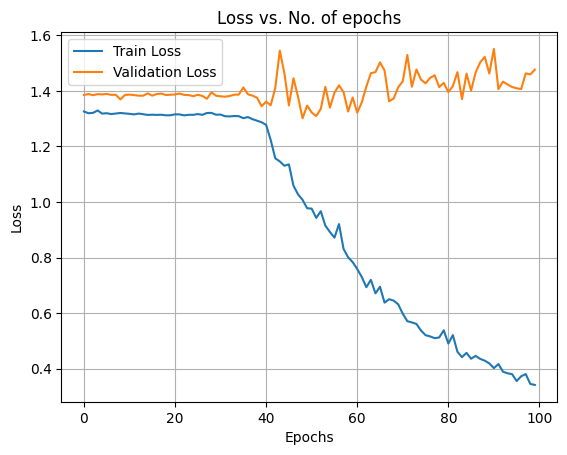

In [ ]:
plt.plot(rain_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss vs. No. of epochs')


In [ ]:
save_results(rain_losses, valid_losses, f'/content/drive/MyDrive/Btech project/saum_mmal/results/{FILE_NAME}.pkl')


In [ ]:
model = torch.load(f'//content/drive/MyDrive/Btech project/saum_mmal/models/{FILE_NAME}.pt').to(device)

test(model, testdata, 'affect', is_packed=False,
     criterion=torch.nn.L1Loss(), task="posneg-classification", no_robust=True)

Recall: 61.5854% | Total Accuracy: 60.6414%
Inference Time: 1s84ms
Inference Params: 1680897
